### British Airways Review Analysis & Text Analysis

In [1]:
# 1. Importing required libraries
import pandas as pd
import numpy as np
%load_ext sql
import pyodbc
import  matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import re 
import nltk 
from nltk.corpus import stopwords 
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

In [2]:
# 2. Loading the SQL query in Python and converting dataset into a DataFrame
conn = pyodbc.connect(r"DRIVER={ODBC Driver 17 for SQL Server};" r"SERVER=PARIKSHITA-COMP\SQLEXPRESS;" r"DATABASE=PortfolioProjects;" r"Trusted_Connection=yes;")
cursor = conn.cursor().execute("select [Seat Comfort],[Cabin Staff Service],[Food & Beverages],[Inflight Entertainment],[Ground Service],[Value For Money],[Wifi & Connectivity] from PortfolioProjects..british_airways_review") 
query2 = cursor.fetchall()
conn.close()
rating_df = pd.DataFrame.from_records(query2,columns = ['Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment','Ground Service','Value For Money','Wifi & Connectivity'])

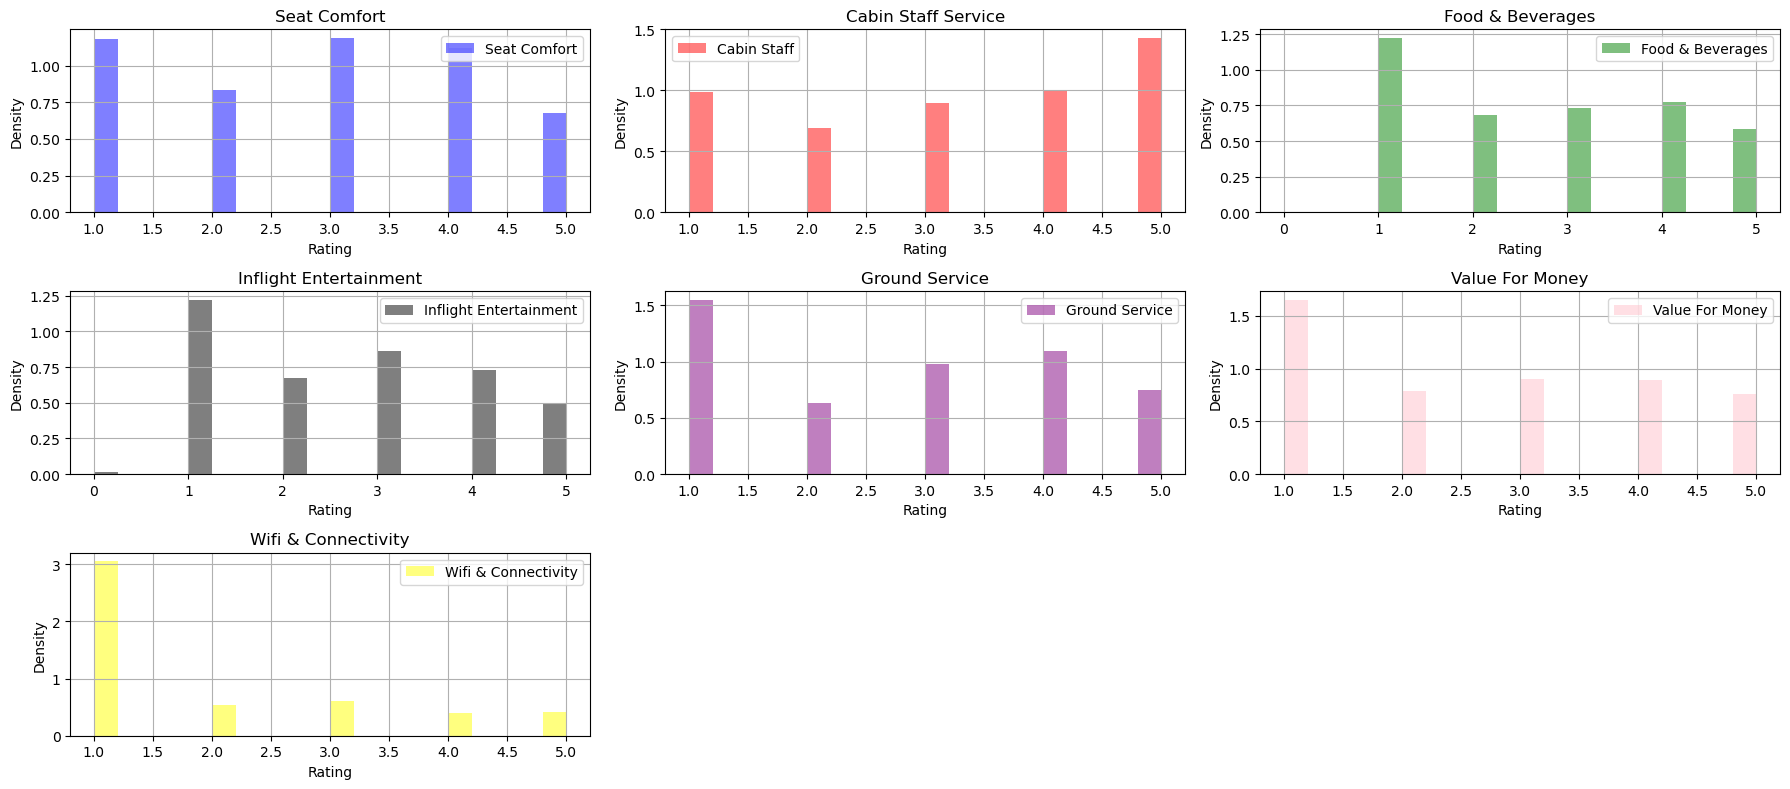

In [3]:
# 3. Plotting the histogram for the ratings of different services to understand its efficiency as per the customers
fig,axs = plt.subplots(3,3,figsize=(18,8))

rating_df['Seat Comfort'].hist(ax=axs[0, 0], bins=20, alpha=0.5, label='Seat Comfort', color='blue', density=True)
axs[0, 0].set_title('Seat Comfort')
axs[0, 0].set_xlabel('Rating')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend()

rating_df['Cabin Staff Service'].hist(ax=axs[0, 1], bins=20, alpha=0.5, label='Cabin Staff', color='red', density=True)
axs[0, 1].set_title('Cabin Staff Service')
axs[0, 1].set_xlabel('Rating')
axs[0, 1].set_ylabel('Density')
axs[0, 1].legend()

rating_df['Food & Beverages'].hist(ax=axs[0, 2], bins=20, alpha=0.5, label='Food & Beverages', color='green', density=True)
axs[0, 2].set_title('Food & Beverages')
axs[0, 2].set_xlabel('Rating')
axs[0, 2].set_ylabel('Density')
axs[0, 2].legend()

rating_df['Inflight Entertainment'].hist(ax=axs[1, 0], bins=20, alpha=0.5, label='Inflight Entertainment', color='black', density=True)
axs[1, 0].set_title('Inflight Entertainment')
axs[1, 0].set_xlabel('Rating')
axs[1, 0].set_ylabel('Density')
axs[1, 0].legend()

rating_df['Ground Service'].hist(ax=axs[1, 1], bins=20, alpha=0.5, label='Ground Service', color='purple', density=True)
axs[1, 1].set_title('Ground Service')
axs[1, 1].set_xlabel('Rating')
axs[1, 1].set_ylabel('Density')
axs[1, 1].legend()

rating_df['Value For Money'].hist(ax=axs[1, 2], bins=20, alpha=0.5, label='Value For Money', color='pink', density=True)
axs[1, 2].set_title('Value For Money')
axs[1, 2].set_xlabel('Rating')
axs[1, 2].set_ylabel('Density')
axs[1, 2].legend()

rating_df['Wifi & Connectivity'].hist(ax=axs[2, 0], bins=20, alpha=0.5, label='Wifi & Connectivity', color='yellow', density=True)
axs[2, 0].set_title('Wifi & Connectivity')
axs[2, 0].set_xlabel('Rating')
axs[2, 0].set_ylabel('Density')
axs[2, 0].legend()

fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])

plt.tight_layout()  
plt.show()

In [4]:
# 4. Loading the SQL query in Python and converting dataset into a DataFrame
conn = pyodbc.connect(r"DRIVER={ODBC Driver 17 for SQL Server};" r"SERVER=PARIKSHITA-COMP\SQLEXPRESS;" r"DATABASE=PortfolioProjects;" r"Trusted_Connection=yes;")
cursor = conn.cursor().execute("select main_text from PortfolioProjects..british_airways_review") 
query1 = cursor.fetchall()
conn.close()
main_textdf = pd.DataFrame.from_records(query1,columns = ['Text'])

In [5]:
# 5. Text Cleaning Function
pd.set_option('display.max_rows', 100)
def clean_text(text):
    text = text.lower() #convert to lower case
    text = re.sub(r'\W+',' ',text) # removing special characters
    cleaned_words = []

    for word in text.split():      
       if word not in stopwords.words('english'):
          cleaned_words.append(word) #removing words like(eg: is,and,the,etc)
           
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

main_textdf['cleaned_text'] = main_textdf['Text'].apply(clean_text) # Calling the function using the dataset

In [18]:
# 6. Tokenization, i.e converting each string into list of words
main_textdf["Tokens"] = main_textdf["cleaned_text"].apply(word_tokenize)

In [21]:
# 7. Word Frequency Analysis
#For all the words in each list, those words are converted to indivdual items and its frequency is known using the 'Counter' class imported from the Collections module
all_words = []
for tokens in main_textdf['Tokens']:
    for word in tokens:
        all_words.append(word)
word_freq = Counter(all_words)
freq_word_df = pd.DataFrame(word_freq.items(),columns = ['word','count'])
#filtered_df = freq_word_df.set_index('word',inplace=False)
#filtered_df = filtered_df.drop(['british','airways','customer','review','service','ba','flight','crew','experience','airline','flight','crew','cabin','seats','food','seats'],axis=0)

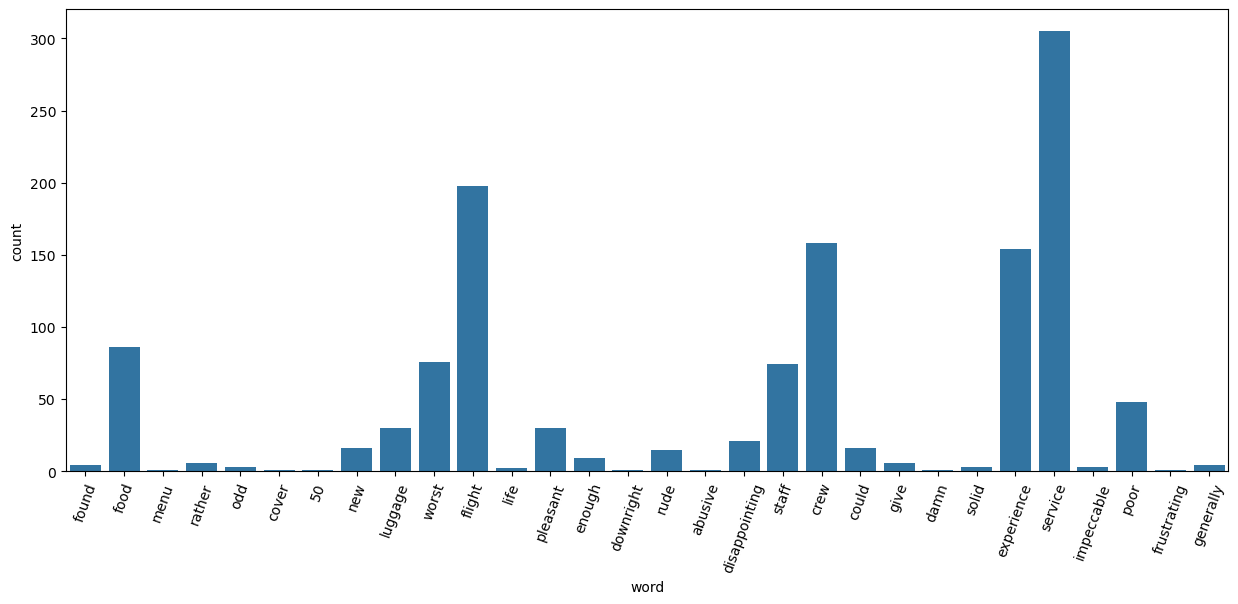

In [22]:
# 8. Word Frequency Visualization
plt.figure(figsize = (15,6))
sns.barplot(x=freq_word_df['word'][:30],y=freq_word_df['count'][:30])
plt.xticks(rotation=70)
plt.show()

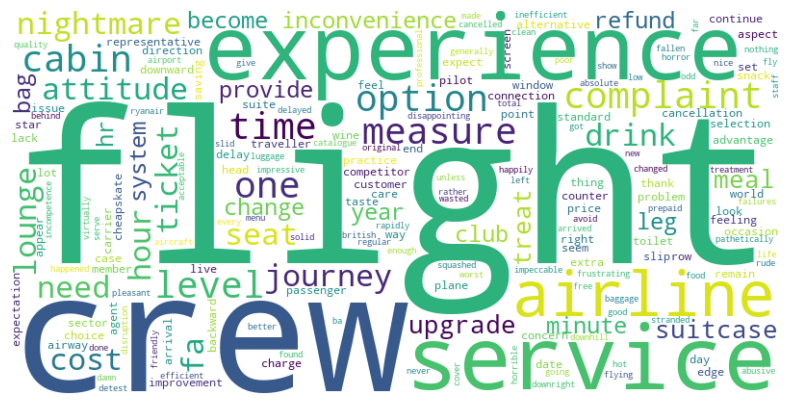

In [23]:
# 9. WordCloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(freq_word_df['word'].tolist()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

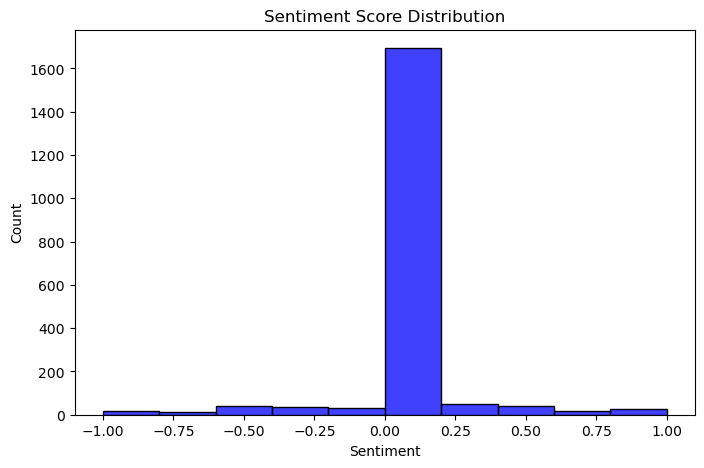

In [26]:
# 10. Sentiment Analysis
freq_word_df["Sentiment"] = freq_word_df["word"].apply(lambda text: TextBlob(text).sentiment.polarity)
plt.figure(figsize=(8,5))
sns.histplot(freq_word_df["Sentiment"], bins=10, color="blue")
plt.title("Sentiment Score Distribution")
plt.show()

### Conclusion

In [32]:
print("\nKey Findings:")
print("- Ratings out of 5 : Highlighted in histogram for each services")
print("- Common words: Highlighted in bar chart & word cloud.")
print("- Sentiment Analysis: Shows polarity distribution.")


Key Findings:
- Ratings out of 5 : Highlighted in histogram for each services
- Common words: Highlighted in bar chart & word cloud.
- Sentiment Analysis: Shows polarity distribution.
